In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, preprocessing
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import Markdown as md

%matplotlib widget  # Generates interactive plots

## Purpose

The purpose of this file is to demonstrate by example statistical methods that can be used to discriminate between linear models. The file is a work in progress, with only the ANCOVA method being complete. It is not meant as a treatise on statistical theory, but a reference for quick practical implementation. Efforts have been made to ensure accuracy, but I am no statistician and any corrections or suggestions are welcome.

## Table of Contents

1. [Data Generation](#data)
2. [ANCOVA](#ancova)

# Data Generation
<a id='data'></a>

## Simple Grouped Data

This data consists of two groups with a single parameter that effects the predictor. In other words there is a single independent and dependent variable for each group. In this dataset the coefficients for the parameter (independent variable) differ for each group.

In [2]:
## Generate two groups of example data with some normally distributed noise
g1_count = 100  # group 1 number of datapoints
g2_count = 100  # group 2 number of datapoints

x_g1_simple= np.linspace(8, 18, g1_count)  # array of x1 values for group 1
y_g1_simple = 1700*x_g1_simple + 3000 + 1000*np.random.normal(loc=0, scale=2, size=g1_count)  # array of y values for group 1

x_g2_simple = np.linspace(2, 12, g2_count)  # array of x1 values for group 2
y_g2_simple = 1000*x_g2_simple + 3000 + 1000*np.random.normal(loc=0, scale=2, size=g2_count)  # array of y values for group 2

df_simple = pd.DataFrame({"x_g1": x_g1_simple, "x_g2": x_g2_simple, "y_g1": y_g1_simple, "y_g2": y_g2_simple})  # create dataframe
df_simple

,x_g1,x_g2,y_g1,y_g2
0,8.00000,2.00000,15996.328021,7826.165732
1,8.10101,2.10101,17773.186202,5511.080327
2,8.20202,2.20202,17497.913916,5417.334114
3,8.30303,2.30303,16003.004450,10223.885306
4,8.40404,2.40404,19928.033747,6159.783718
...,...,...,...,...
95,17.59596,11.59596,33107.775406,15977.096105
96,17.69697,11.69697,32953.520085,13554.375879
97,17.79798,11.79798,32120.043355,14998.896546
98,17.89899,11.89899,31890.441203,13088.073106


[Text(0.5, 0, '$x$'), Text(0, 0.5, '$y$')]

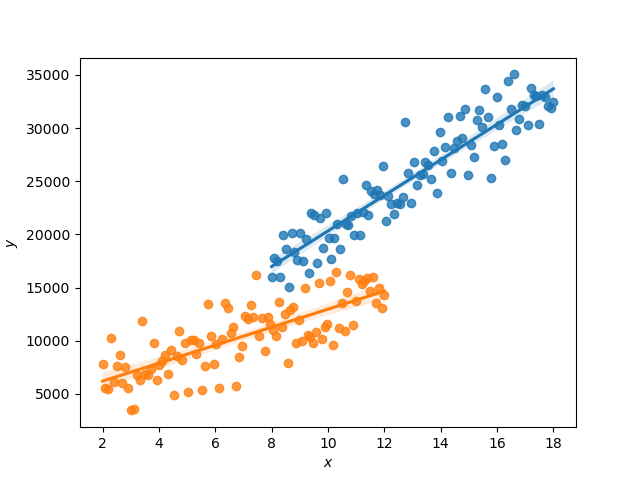

In [3]:
fig, ax = plt.subplots()

sns.regplot(data=df_simple, x="x_g1", y="y_g1")
sns.regplot(data=df_simple, x="x_g2", y="y_g2")

ax.set(xlabel="$x$", ylabel="$y$")

## Three Dimensional Data

This data consists of two groups with two parameters ($x1$, $x2$) that effect the predictor ($y$). The parameter coefficients are the same for each group. The primary parameter of concern is $x1$, with $x2$ causing the potential seperation in the $x1$ space.

In [4]:
## Generate two groups of example data with some normally distributed noise
g1_count = 1000  # group 1 number of datapoints
g2_count = 1000  # group 2 number of datapoints

x1_g1= np.linspace(8, 18, g1_count)  # array of x1 values for group 1
x2_g1 = np.linspace(6, 10, g1_count)  # array of x2 values for group 1
y_g1 = 1000*x1_g1 - 700*x2_g1 + 3000 + 1000*np.random.normal(loc=0, scale=2, size=g1_count)  # array of y values for group 1

x1_g2 = np.linspace(2, 12, g1_count)  # array of x1 values for group 2
x2_g2 = np.linspace(2, 6, g2_count)  # array of x2 values for group 2
y_g2 = 1000*x1_g2 - 700*x2_g2 + 3000 + 1000*np.random.normal(loc=0, scale=2, size=g2_count)  # array of y values for group 2

df = pd.DataFrame({"x1_g1": x1_g1, "x2_g1": x2_g1, "x1_g2": x1_g2, "x2_g2": x2_g2, "y_g1": y_g1, "y_g2": y_g2})  # create dataframe
df

,x1_g1,x2_g1,x1_g2,x2_g2,y_g1,y_g2
0,8.00000,6.000000,2.00000,2.000000,5482.012427,5239.703994
1,8.01001,6.004004,2.01001,2.004004,7559.311381,-46.208225
2,8.02002,6.008008,2.02002,2.008008,5294.152730,-162.979377
3,8.03003,6.012012,2.03003,2.012012,7619.224319,131.729321
4,8.04004,6.016016,2.04004,2.016016,6239.238130,3648.043199
...,...,...,...,...,...,...
995,17.95996,9.983984,11.95996,5.983984,13291.435824,12050.466885
996,17.96997,9.987988,11.96997,5.987988,12642.734940,9059.525369
997,17.97998,9.991992,11.97998,5.991992,14297.577133,12493.439549
998,17.98999,9.995996,11.98999,5.995996,11917.782819,10175.166179


[Text(0.5, 0, '$x_1$'), Text(0.5, 0.5, '$x_2$'), Text(0.5, 0, '$y$')]

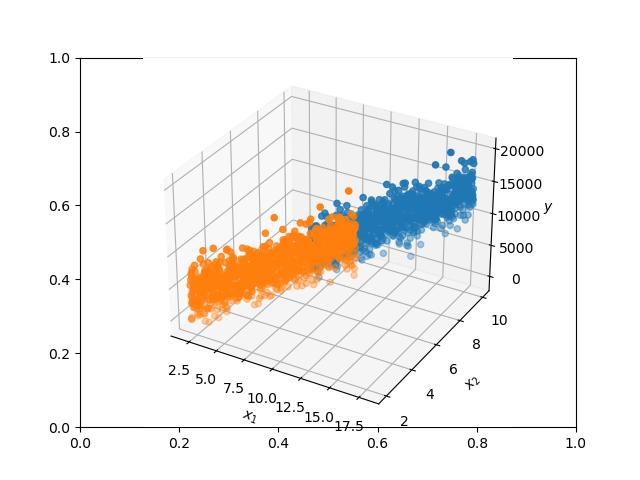

In [5]:
## Scatterplot of data
fig, ax = plt.subplots()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1_g1, x2_g1, y_g1)
ax.scatter(x1_g2, x2_g2, y_g2)

ax.set(xlabel="$x_1$", ylabel="$x_2$", zlabel="$y$")

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$y$')]

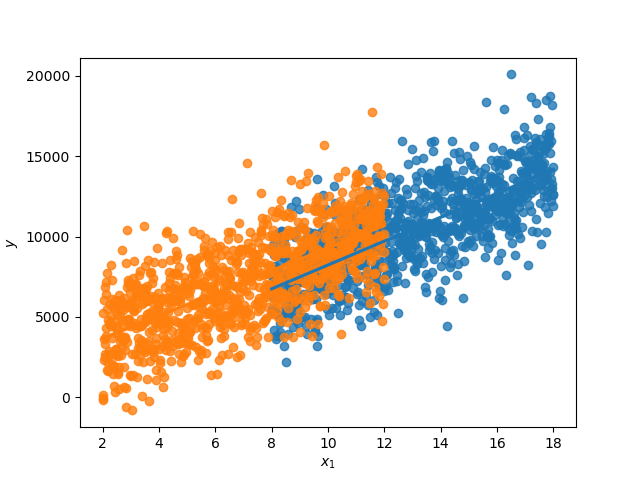

In [6]:
fig, ax = plt.subplots()

sns.regplot(data=df, x="x1_g1", y="y_g1")
sns.regplot(df, x="x1_g2", y="y_g2")

ax.set(xlabel="$x_1$", ylabel="$y$")

[Text(0.5, 0, '$x_2$'), Text(0, 0.5, '$y$')]

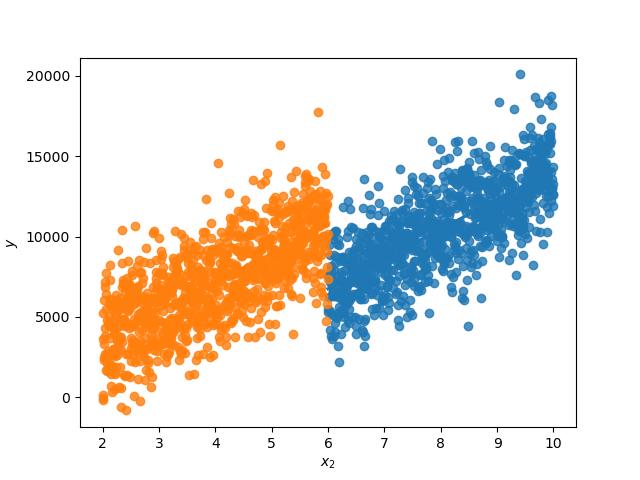

In [7]:
fig, ax = plt.subplots()

sns.regplot(data=df, x="x2_g1", y="y_g1")
sns.regplot(df, x="x2_g2", y="y_g2")

ax.set(xlabel="$x_2$", ylabel="$y$")

## Linear models validation

Notation used for linear regression
$$\hat{y} (w, x) = \beta_0 + \beta_1x_1 + ... + \beta_px_p$$

Where:
* $\hat{y}$ = predicted value
* $\beta_0$ = intercept
* $(\beta_1...\beta_p)$ = coefficients
* $(x_1...x_p)$ = dimensions

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning (Vol. 103). Springer New York. https://doi.org/10.1007/978-1-4614-7138-7

### Seperate Models

The linear models below consist of a separate model for each group.

#### Statsmodels type 1

Endog is the dependent variable while exog is the independent variable

In [8]:
x1_g1_sm = df["x1_g1"]
x1_g2_sm = df["x1_g2"]

x1_g1_sm = sm.add_constant(x1_g1_sm) # add column of ones to include intercept term in model
x1_g2_sm = sm.add_constant(x1_g2_sm) # add column of ones to include intercept term in model

lm1_sm = sm.OLS(endog=df["y_g1"], exog=x1_g1_sm).fit()
lm2_sm = sm.OLS(endog=df["y_g2"], exog=x1_g2_sm).fit()

In [9]:
md(f"For group 1, $y = {lm1_sm.params.x1_g1:0.5}x_1 +  {lm1_sm.params.const:0.5}$ <br />"
  f"For group 2, $y = {lm2_sm.params.x1_g2:0.5}x_1 +  {lm2_sm.params.const:0.5}$")

For group 1, $y = 741.74x_1 +  812.11$ <br />For group 2, $y = 703.46x_1 +  2254.1$

In [10]:
lm1_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_g1   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1215.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          8.95e-175
Time:                        09:56:48   Log-Likelihood:                -8990.7
No. Observations:                1000   AIC:                         1.799e+04
Df Residuals:                     998   BIC:                         1.800e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        812.1051    283.388      2.866      0.004     256.001    1368.209
x1_g1        741.7449     21.280     34.857      0.000     699.987     783.503
==============================================================================
Omnibus:                        2.451   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                2.422
Skew:                           0.063   Prob(JB):                        0.298
Kurtosis:                       3.205   Cond. No.                         61.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
lm2_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_g2   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     960.0
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          3.25e-148
Time:                        09:56:48   Log-Likelihood:                -9055.5
No. Observations:                1000   AIC:                         1.812e+04
Df Residuals:                     998   BIC:                         1.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2254.1466    171.939     13.110      0.000    1916.743    2591.550
x1_g2        703.4567     22.704     30.983      0.000     658.903     748.010
==============================================================================
Omnibus:                        0.973   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                1.020
Skew:                           0.074   Prob(JB):                        0.601
Kurtosis:                       2.948   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statsmodels type 2

In [12]:
lm1_sm2 = smf.ols(formula="y_g1 ~ x1_g1", data=df).fit()
lm2_sm2 = smf.ols(formula="y_g2 ~ x1_g2", data=df).fit()

In [13]:
md(f"For group 1, $y = {lm1_sm2.params.x1_g1:0.5}x_1 +  {lm1_sm2.params.Intercept:0.5}$ <br />"
  f"For group 2, $y = {lm2_sm2.params.x1_g2:0.5}x_1 +  {lm2_sm2.params.Intercept:0.5}$")

For group 1, $y = 741.74x_1 +  812.11$ <br />For group 2, $y = 703.46x_1 +  2254.1$

In [14]:
lm1_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_g1   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1215.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          8.95e-175
Time:                        09:56:48   Log-Likelihood:                -8990.7
No. Observations:                1000   AIC:                         1.799e+04
Df Residuals:                     998   BIC:                         1.800e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    812.1051    283.388      2.866      0.004     256.001    1368.209
x1_g1        741.7449     21.280     34.857      0.000     699.987     783.503
==============================================================================
Omnibus:                        2.451   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                2.422
Skew:                           0.063   Prob(JB):                        0.298
Kurtosis:                       3.205   Cond. No.                         61.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
lm2_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   y_g2   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     960.0
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          3.25e-148
Time:                        09:56:48   Log-Likelihood:                -9055.5
No. Observations:                1000   AIC:                         1.812e+04
Df Residuals:                     998   BIC:                         1.812e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2254.1466    171.939     13.110      0.000    1916.743    2591.550
x1_g2        703.4567     22.704     30.983      0.000     658.903     748.010
==============================================================================
Omnibus:                        0.973   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                1.020
Skew:                           0.074   Prob(JB):                        0.601
Kurtosis:                       2.948   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
lm1_sk = linear_model.LinearRegression().fit(x1_g1.reshape(-1,1), y_g1.reshape(-1,1))
lm2_sk = linear_model.LinearRegression().fit(x1_g2.reshape(-1,1), y_g2.reshape(-1,1))

In [17]:
md(f"For group 1, $y = {lm1_sk.coef_[0][0]:0.5}x_1 + {lm1_sk.intercept_[0]:0.5}$ <br />"
    f"For group 2, $y = {lm2_sk.coef_[0][0]:0.5}x_1 + {lm2_sk.intercept_[0]:0.5}$")

For group 1, $y = 741.74x_1 + 812.11$ <br />For group 2, $y = 703.46x_1 + 2254.1$

#### Scipy stats model

In [18]:
lm1_sp = stats.linregress(x=x1_g1, y=y_g1, alternative='two-sided')
lm2_sp = stats.linregress(x=x1_g2, y=y_g2, alternative='two-sided')

In [19]:
md(f"For group 1, $y = {lm1_sp.slope:0.5}x_1 + {lm1_sp.intercept:0.5}$ <br />"
    f"For group 2, $y = {lm2_sp.slope:0.5}x_1 + {lm2_sp.intercept:0.5}$")

For group 1, $y = 741.74x_1 + 812.11$ <br />For group 2, $y = 703.46x_1 + 2254.1$

### 3D Model

#### Reform data

In [20]:
x1 = np.concatenate((x1_g1, x1_g2))
x2 = np.concatenate((x2_g1, x2_g2))
x_c = np.column_stack((x1, x2))
y = np.concatenate((y_g1, y_g2))

group_list = np.concatenate((np.array((len(x1_g1)*["A"])), np.array((len(x1_g2)*["B"]))))

df_c = pd.DataFrame({"x1": x1, "x2": x2, "y": y, "group": group_list})
df_c

,x1,x2,y,group
0,8.00000,6.000000,5482.012427,A
1,8.01001,6.004004,7559.311381,A
2,8.02002,6.008008,5294.152730,A
3,8.03003,6.012012,7619.224319,A
4,8.04004,6.016016,6239.238130,A
...,...,...,...,...
1995,11.95996,5.983984,12050.466885,B
1996,11.96997,5.987988,9059.525369,B
1997,11.97998,5.991992,12493.439549,B
1998,11.98999,5.995996,10175.166179,B


#### Scikit-learn model

In [21]:
lm1_sk = linear_model.LinearRegression().fit(x_c, y.reshape(-1,1))

In [22]:
md(f" $y = {lm1_sk.coef_[0][0]:0.5}x_1 + {lm1_sk.coef_[0][1]:0.5}x_2 + {lm1_sk.intercept_[0]:0.5}$")

 $y = 987.39x_1 + -661.97x_2 + 2914.5$

#### Statsmodels linear interaction models

In [23]:
lm_interact_mc = smf.ols('y ~ x2 + x1 + x1:x2', data=df_c).fit()  # statsmodels linear interaction model with second independent variable
lm_interact_mc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:56:48   Log-Likelihood:                -18048.
No. Observations:                2000   AIC:                         3.610e+04
Df Residuals:                    1996   BIC:                         3.613e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3228.7937    266.637     12.109      0.000    2705.878    3751.709
x2          -724.0130     93.284     -7.761      0.000    -906.958    -541.068
x1           950.1676     52.807     17.993      0.000     846.606    1053.730
x1:x2          6.2038      4.626      1.341      0.180      -2.869      15.277
==============================================================================
Omnibus:                        2.131   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                2.037
Skew:                           0.069   Prob(JB):                        0.361
Kurtosis:                       3.073   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lm_interact_mc = smf.ols('y ~ group + x1 + x1:group', data=df_c).fit() # statsmodels linear interaction model with groups
lm_interact_mc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:56:48   Log-Likelihood:                -18048.
No. Observations:                2000   AIC:                         3.610e+04
Df Residuals:                    1996   BIC:                         3.613e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       812.1051    293.027      2.771      0.006     237.434    1386.776
group[T.B]     1442.0414    337.092      4.278      0.000     780.952    2103.131
x1              741.7449     22.004     33.710      0.000     698.593     784.897
x1:group[T.B]   -38.2882     31.118     -1.230      0.219     -99.315      22.738
==============================================================================
Omnibus:                        2.134   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                2.040
Skew:                           0.069   Prob(JB):                        0.361
Kurtosis:                       3.073   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ANCOVA
<a id='ancova'></a>

ANCOVA is a specific type of linear regression descrimination

http://www.biostathandbook.com/ancova.html

https://web.archive.org/web/20230223045335/http://www.biostathandbook.com/ancova.html

https://www.reneshbedre.com/blog/ancova.html

https://web.archive.org/web/20230201184317/https://www.reneshbedre.com/blog/ancova.html

https://www.statology.org/ancova/

https://statisticsbyjim.com/regression/comparing-regression-lines/

## Application and Assumptions

Used to test for significance between different linear models that include at least one continuous and one categorical independent variable. Test will determine if model is a better fit when including the catagorical term than without.

>Null hypotheses:
>* Slopes of regression lines are all equal
>* Y intercepts of regression lines are all the same/ adjusted means of the group (least squares means) are the same


>Assumptions:
>* Linear relationship between dependent variable and covariate
>* Normally distributed residuals
>* Dependent variable and covariate are continuous
>* Equal variances (homogeneity) between sample populations
>* No interaction between categorical independent variable and covariate (homogeneity within-group regression slopes) i.e. slopes of lineas in different samples should be the same

## Prepare Data

Because the different variables have different units and therefore drastically different distances, the data should be normalized so distances are more meaningful to the model. Z-score is a common method for normalizing data assumed to be normally distributed.

$$Z = \frac{x - \mu}{\sigma}$$
Where:
* $Z$ = standard score
* $x$ = observed value
* $\mu$ = sample mean
* $\sigma$ = sample standard deviation

In [25]:
## Sample data for ANCOVA, combines x and y values to a single column each and adds a categorical column

x1 = np.concatenate((x1_g1, x1_g2))  # append group 2 x1 values to group 1 x1 values
x2 = np.concatenate((x2_g1, x2_g2))
#x_c = np.column_stack((x1, x2))
y = np.concatenate((y_g1, y_g2))

x1_zscore = stats.zscore(x1)
x2_zscore = stats.zscore(x2)
y_zscore = stats.zscore(y)

group_list = np.concatenate((np.array((len(x1_g1)*["A"])), np.array((len(x1_g2)*["B"]))))

df_c_scaled = pd.DataFrame({"x1": x1_zscore, "x2": x2_zscore, "y": y_zscore, "group": group_list})
df_c_scaled

,x1,x2,y,group
0,-0.480153,0.000000,-1.001705,A
1,-0.477750,0.001733,-0.377681,A
2,-0.475347,0.003467,-1.058138,A
3,-0.472944,0.005200,-0.359683,A
4,-0.470541,0.006933,-0.774233,A
...,...,...,...,...
1995,0.470541,-0.006933,0.971469,B
1996,0.472944,-0.005200,0.072985,B
1997,0.475347,-0.003467,1.104538,B
1998,0.477750,-0.001733,0.408125,B


In [26]:
lm_ancova = smf.ols('y ~ group + x1', data=df_c_scaled).fit()  # Additive moderation model
lm_ancova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1742.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:56:48   Log-Likelihood:                -1828.3
No. Observations:                2000   AIC:                             3663.
Df Residuals:                    1997   BIC:                             3679.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1591      0.024     -6.713      0.000      -0.206      -0.113
group[T.B]     0.3182      0.039      8.170      0.000       0.242       0.395
x1             0.9042      0.019     46.437      0.000       0.866       0.942
==============================================================================
Omnibus:                        2.246   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                2.151
Skew:                           0.071   Prob(JB):                        0.341
Kurtosis:                       3.075   Cond. No.                         4.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
lm_ancova.pvalues

Intercept      2.472769e-11
group[T.B]     5.388203e-16
x1            6.990041e-320
dtype: float64

If the p-values are less than an arbitrarily defined (but conventional) 0.05, the null hypothesis is rejected and the linear regressions are likely to be different from each other.

## Test for normal residuals

In [28]:
resid_ancova = lm_ancova.resid

[Text(0.5, 0, 'Residual Value'), Text(0, 0.5, 'Count')]

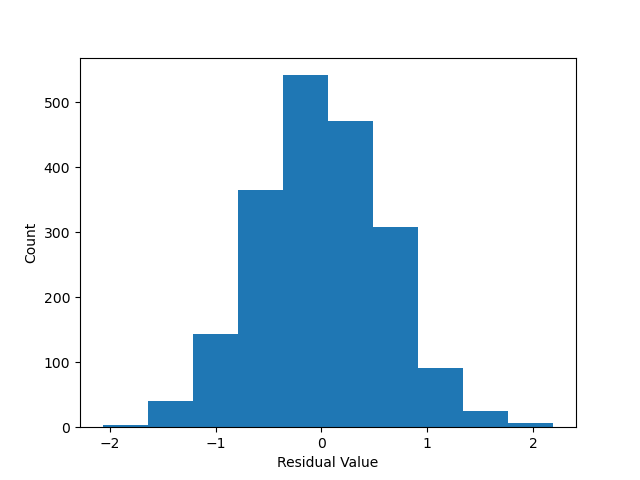

In [29]:
fig, ax = plt.subplots()

ax.hist(lm_ancova.resid)

ax.set(xlabel="Residual Value", ylabel="Count")

### Jarque-Bera Test

Tests if skewness and kurtosis of data are similar to a normal distrubution. If test statistic is close to zero an the p-value is above some predetermined value (typically 0.05), the data is assumed to be normal.

In [30]:
test_result_names = ['Jarque-Bera', 'JB_p_value', 'Skew', 'Kurtosis']
jb_test = sm.stats.stattools.jarque_bera(resid_ancova, axis=0)
jb_results = dict(zip(test_result_names, jb_test))
jb_results

{'Jarque-Bera': 2.1512754707338346,
 'JB_p_value': 0.34108016704102767,
 'Skew': 0.07095103254918067,
 'Kurtosis': 3.075359867101969}

### Shapiro-Wilk test for normality

p-value may not be accurate with more than 5000 datapoints

In [31]:
stats.shapiro(resid_ancova)

ShapiroResult(statistic=0.9990060329437256, pvalue=0.3377867639064789)

### D'Agostino and Pearson's test for normality

In [32]:
stats.normaltest(resid_ancova)

NormaltestResult(statistic=2.246143168938633, pvalue=0.3252791362632988)

## Test for equal variances between groups

### Bartlett's test for equal variances

In [33]:
stats.bartlett(df["y_g1"], df["y_g2"])

BartlettResult(statistic=0.012797820990077882, pvalue=0.9099295090620018)

## Test for interaction of catagorical independent variable and covariate

### Linear interaction model by group

Least squares model for y as a function of "group", and "x", and "the interaction between x and group".

$$y = x\beta_1 + \text{group}\beta_2 + x*\text{group}\beta_3 + \beta_0$$

Where "group" can be a catagory/indicator (0 or 1) or a continuous variable

In [34]:
lm_inter_group = smf.ols("y ~ group + x1 + x1:group", data=df_c).fit()  # linear interaction model, alternate notation
lm_inter_group.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:56:49   Log-Likelihood:                -18048.
No. Observations:                2000   AIC:                         3.610e+04
Df Residuals:                    1996   BIC:                         3.613e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       812.1051    293.027      2.771      0.006     237.434    1386.776
group[T.B]     1442.0414    337.092      4.278      0.000     780.952    2103.131
x1              741.7449     22.004     33.710      0.000     698.593     784.897
x1:group[T.B]   -38.2882     31.118     -1.230      0.219     -99.315      22.738
==============================================================================
Omnibus:                        2.134   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                2.040
Skew:                           0.069   Prob(JB):                        0.361
Kurtosis:                       3.073   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis of variance (ANOVA) table for fitted linear model

In [35]:
sm.stats.anova_lm(lm_inter_group, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,3.105136e+07,1.0,7.680841,5.632783e-03
group,7.398261e+07,1.0,18.300283,1.975944e-05
x1,4.594059e+09,1.0,1136.382831,1.408414e-197
x1:group,6.120508e+06,1.0,1.513964,2.186802e-01
Residual,8.069236e+09,1996.0,NaN,NaN


**PR(> F)** – This is the p-value associated with the F statistic of a given effect and test statistic

#### Alternate notation

Alternate notation for the same linear interaction model. Results are the same as the above interaction model.

In [36]:
lm_inter_group_alt = smf.ols('y ~ group * x1', data=df_c).fit()  # linear interaction model

In [37]:
sm.stats.anova_lm(lm_inter_group_alt, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,3.105136e+07,1.0,7.680841,5.632783e-03
group,7.398261e+07,1.0,18.300283,1.975944e-05
x1,4.594059e+09,1.0,1136.382831,1.408414e-197
group:x1,6.120508e+06,1.0,1.513964,2.186802e-01
Residual,8.069236e+09,1996.0,NaN,NaN


## Linear interaction model with second continuous parameter

Least squares model for y as a function of $x_1$, and $x_2$, and "the interaction between $x_1$ and $x_2$".

$$y = x_1\beta_1 + x_2\beta_2 + x_1x_2\beta_3 + \beta_0$$

In this case $x_1$, and $x_2$ are continuous variables

In [38]:
lm_inter_cont = smf.ols('y ~ x2 + x1 + x1:x2', data=df_c).fit()  # statsmodels linear interaction model with second independent variable
lm_inter_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:56:49   Log-Likelihood:                -18048.
No. Observations:                2000   AIC:                         3.610e+04
Df Residuals:                    1996   BIC:                         3.613e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3228.7937    266.637     12.109      0.000    2705.878    3751.709
x2          -724.0130     93.284     -7.761      0.000    -906.958    -541.068
x1           950.1676     52.807     17.993      0.000     846.606    1053.730
x1:x2          6.2038      4.626      1.341      0.180      -2.869      15.277
==============================================================================
Omnibus:                        2.131   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                2.037
Skew:                           0.069   Prob(JB):                        0.361
Kurtosis:                       3.073   Cond. No.                         521.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
sm.stats.anova_lm(lm_inter_cont, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,5.927220e+08,1.0,146.636124,1.273324e-32
x2,2.434928e+08,1.0,60.238758,1.331374e-14
x1,1.308678e+09,1.0,323.759577,3.359009e-67
x1:x2,7.268663e+06,1.0,1.798227,1.800796e-01
Residual,8.068088e+09,1996.0,NaN,NaN


In [40]:
sm.stats.anova_lm(lm_ancova, lm_inter_cont)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1997.0,7.287287e+02,0.0,NaN,NaN,NaN
1,1996.0,8.068088e+09,1.0,-8.068087e+09,-1995.99982,1.0


In [41]:
sm.stats.anova_lm(lm_inter_cont, lm_ancova)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1996.0,8.068088e+09,0.0,NaN,NaN,NaN
1,1997.0,7.287287e+02,-1.0,8.068087e+09,-2.210969e+10,NaN
